# WeatherPy

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started cod

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city YOUR CODE HERE -DONE
    city_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
                      

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    weather_dict = {
    "City":cities,
    "Lat":city_lat,
    "Lng":city_lng,
    "Max Temp":city_max_temp,
    "Humidity":city_humidity,
    "Cloudiness":city_clouds,
    "Wind Speed":city_wind,
    "Country":city_country,
    "Date":city_date
}
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | magistralnyy
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | deputatskiy
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | margate
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | noumea
Processing Record 10 of Set 1 | stonewall
Processing Record 11 of Set 1 | nayoro
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | north myrtle beach
Processing Record 16 of Set 1 | colares
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | kudahuvadhoo
Processing Record 20 of Set 1 | tongliao
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | busselton
Processing Record 23 o

Processing Record 34 of Set 4 | ahipara
Processing Record 35 of Set 4 | abbeville
Processing Record 36 of Set 4 | abadiania
Processing Record 37 of Set 4 | chumikan
Processing Record 38 of Set 4 | nyimba
Processing Record 39 of Set 4 | el alto
Processing Record 40 of Set 4 | korem
Processing Record 41 of Set 4 | baghdad
Processing Record 42 of Set 4 | villa maria
Processing Record 43 of Set 4 | mehamn
Processing Record 44 of Set 4 | marcona
City not found. Skipping...
Processing Record 45 of Set 4 | topolobampo
Processing Record 46 of Set 4 | alta floresta
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | tuatapere
Processing Record 0 of Set 5 | castro
Processing Record 1 of Set 5 | wokha
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | parrita
Processing Record 4 of Set 5 | nelson bay
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | grand river south east
City not found. Ski

Processing Record 26 of Set 8 | waw
Processing Record 27 of Set 8 | wichian buri
Processing Record 28 of Set 8 | kota kinabalu
Processing Record 29 of Set 8 | cairns
Processing Record 30 of Set 8 | pevek
Processing Record 31 of Set 8 | beringovskiy
Processing Record 32 of Set 8 | asyut
Processing Record 33 of Set 8 | lavrentiya
Processing Record 34 of Set 8 | waingapu
Processing Record 35 of Set 8 | jiddah
City not found. Skipping...
Processing Record 36 of Set 8 | remanso
Processing Record 37 of Set 8 | iisalmi
Processing Record 38 of Set 8 | cherskiy
Processing Record 39 of Set 8 | santa cruz
Processing Record 40 of Set 8 | vestmanna
Processing Record 41 of Set 8 | kasulu
Processing Record 42 of Set 8 | lufkin
Processing Record 43 of Set 8 | te anau
Processing Record 44 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 8 | kidal
Processing Record 46 of Set 8 | bilma
Processing Record 47 of Set 8 | norman wells
Processing Record 48 of Set 8 | puerto escondido

Processing Record 14 of Set 12 | ust-omchug
Processing Record 15 of Set 12 | isangel
Processing Record 16 of Set 12 | plettenberg bay
Processing Record 17 of Set 12 | dicabisagan
Processing Record 18 of Set 12 | pacific grove
Processing Record 19 of Set 12 | vuktyl
Processing Record 20 of Set 12 | campbell river
Processing Record 21 of Set 12 | oxford
Processing Record 22 of Set 12 | aviles
Processing Record 23 of Set 12 | walvis bay
Processing Record 24 of Set 12 | cuenca
Processing Record 25 of Set 12 | svetlyy
Processing Record 26 of Set 12 | agadez
Processing Record 27 of Set 12 | visby
Processing Record 28 of Set 12 | san matias
Processing Record 29 of Set 12 | vanimo
Processing Record 30 of Set 12 | kiama
Processing Record 31 of Set 12 | falesti
Processing Record 32 of Set 12 | tiznit
Processing Record 33 of Set 12 | yarmouth
Processing Record 34 of Set 12 | warqla
City not found. Skipping...
Processing Record 35 of Set 12 | port hueneme
Processing Record 36 of Set 12 | ajdabiya


In [4]:
city_data_df = pd.DataFrame(weather_dict)
city_data_df.count()

City          626
Lat           626
Lng           626
Max Temp      626
Humidity      626
Cloudiness    626
Wind Speed    626
Country       626
Date          626
dtype: int64

In [5]:
# Convert the cities weather data into a Pandas DataFrame
weather_dict = {
    "City":cities,
    "Lat":city_lat,
    "Lng":city_lng,
    "Max Temp":city_max_temp,
    "Humidity":city_humidity,
    "Cloudiness":city_clouds,
    "Wind Speed":city_wind,
    "Country":city_country,
    "Date":city_date
}

city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,16.88,79,0,3.60,ZA,1682459870
1,magistralnyy,56.1725,107.4458,-0.59,94,99,1.03,RU,1682460226
2,rikitea,-23.1203,-134.9692,25.41,72,31,4.36,PF,1682460109
3,deputatskiy,69.3000,139.9000,-6.11,93,95,1.16,RU,1682460130
4,ushuaia,-54.8000,-68.3000,5.81,70,75,1.03,AR,1682460116
...,...,...,...,...,...,...,...,...,...
576,middelburg,-25.7751,29.4648,17.76,44,38,1.34,ZA,1682460868
577,digha,21.6833,87.5500,25.78,68,66,3.60,IN,1682460869
578,kokopo,-4.3520,152.2633,27.51,73,99,0.63,PG,1682460870
579,road town,18.4167,-64.6167,28.05,65,20,2.06,VG,1682460871


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_kq.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data_kq.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,16.88,79,0,3.60,ZA,1682459870
1,magistralnyy,56.1725,107.4458,-0.59,94,99,1.03,RU,1682460226
2,rikitea,-23.1203,-134.9692,25.41,72,31,4.36,PF,1682460109
3,deputatskiy,69.3000,139.9000,-6.11,93,95,1.16,RU,1682460130
4,ushuaia,-54.8000,-68.3000,5.81,70,75,1.03,AR,1682460116


### Create the Scatter Plots Requested
#### Latitude Vs. Temperature

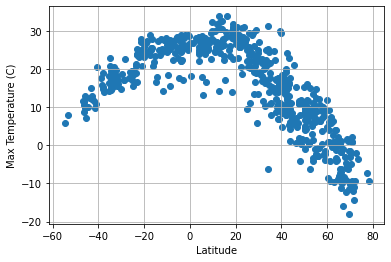

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

lat_data = city_data_df["Lat"]
temp_data = city_data_df["Max Temp"]

plt.scatter(lat_data, temp_data)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity

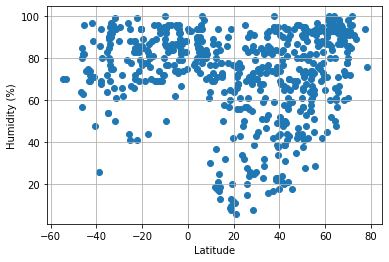

In [51]:
lat_data = city_data_df["Lat"]
humidity_data = city_data_df["Humidity"]

plt.scatter(lat_data, humidity_data)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

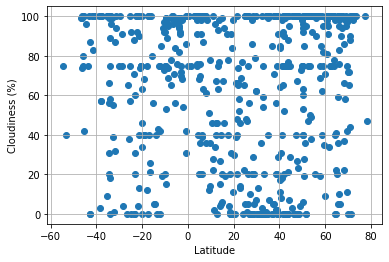

In [52]:
lat_data = city_data_df["Lat"]
cloudiness_data = city_data_df["Cloudiness"]

plt.scatter(lat_data, cloudiness_data)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

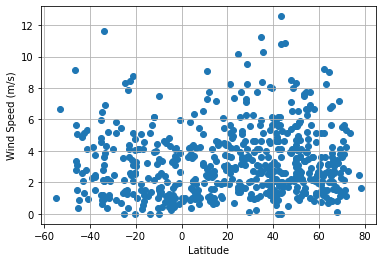

In [53]:
lat_data = city_data_df["Lat"]
wspeed_data = city_data_df["Wind Speed"]

plt.scatter(lat_data, wspeed_data)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

### Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,magistralnyy,56.1725,107.4458,-0.59,94,99,1.03,RU,1682460226
3,deputatskiy,69.3000,139.9000,-6.11,93,95,1.16,RU,1682460130
5,qaanaaq,77.4840,-69.3632,-7.21,94,100,2.45,GL,1682460111
6,margate,51.3813,1.3862,6.50,74,36,0.89,GB,1682460050
9,stonewall,50.1344,-97.3268,9.84,38,53,2.61,CA,1682460292


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,16.88,79,0,3.60,ZA,1682459870
2,rikitea,-23.1203,-134.9692,25.41,72,31,4.36,PF,1682460109
4,ushuaia,-54.8000,-68.3000,5.81,70,75,1.03,AR,1682460116
7,bredasdorp,-34.5322,20.0403,14.45,85,20,1.20,ZA,1682460121
8,noumea,-22.2763,166.4572,25.00,99,100,2.47,NC,1682460014


### Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.881010047108281


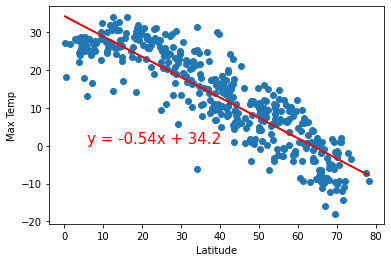

In [14]:
# Northern Hemisphere Temp vs. Lat Lin.Regress
x_lat = northern_hemi_df["Lat"]
y_temp = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_temp)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.8267385963105448


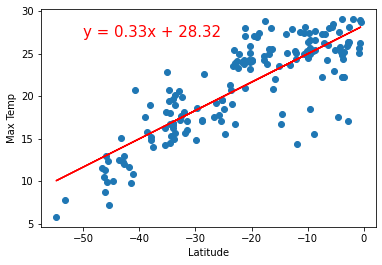

In [36]:
# Southern Hemisphere Temp vs. Lat Lin.Regress
x_lat = southern_hemi_df["Lat"]
y_temp = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_temp)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is:{rvalue}")
plt.show()


**Discussion about the linear relationship:** The r-value of the Northern Hemisphere between the correlation of temperature vs. latitude lies on a a negative slope, which means there is no linear correlation between temperature and latidue in the Northern Hemisphere. On the other hand, the r-value of the Southern Hemisphere lies on a positive slope, of which 0.7 r-value is considered of strong linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.21315329698780763


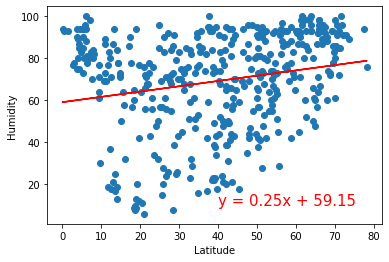

In [37]:
# Northern Hemisphere Humidity lin Regress
x_lat = northern_hemi_df["Lat"]
y_hum = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_hum)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.24057162640353735


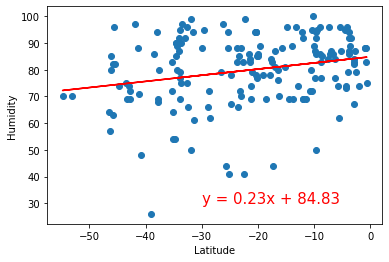

In [38]:
# Southern Hemisphere Humidity lin Regress
x_lat = southern_hemi_df["Lat"]
y_hum = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_hum)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of the Northern Hemisphere between the correlation of humidity vs. latitude lies on a positive slope,with an r-value of 0.28, which is considered below weak linear relationship. On the other hand, the r-value of the Southern Hemisphere lies on a positive slope as well, however its r-value is at 0.25 which is a weaker linear relationship than the Northern Hemispheres. There is still a positive relationship for both, however very both are very weak. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.20889285873975721


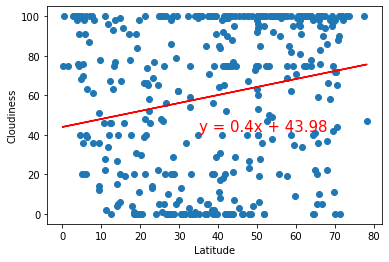

In [41]:
# Northern Hemisphere Cloudiness vs Lat Linear and Regress
x_lat = northern_hemi_df["Lat"]
y_cloud = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloud)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_cloud)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(35,42),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.06181142242768755


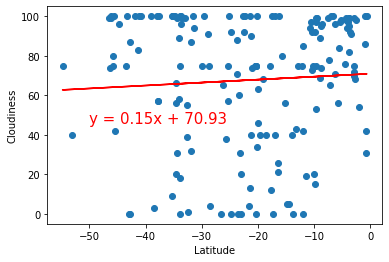

In [45]:
# Southern Hemisphere Cloudiness vs Lat Linear and Regress
x_lat = southern_hemi_df["Lat"]
y_cloud = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloud)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_cloud)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,46),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of the Northern Hemisphere between the correlation of cloudiness vs. latitude lies on a positive slope,with an r-value of 0.08, which is extremely close to zero, meaning when at zero, there would not be any linear relationship. On the other hand, the r-value of the Southern Hemisphere lies on a positive slope as well, however its r-value is at 0.17. The Southern Hemisphere's r-value is at what is considered a weaker linear relationship, meaning there is a very weak positive relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.016838656275993506


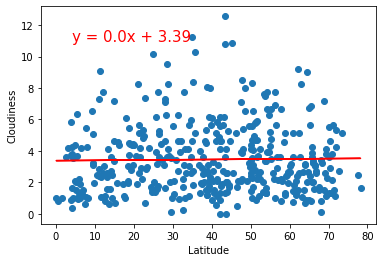

In [47]:
# Nothern Hemisphere Wind Speed vs Lat Linear and Regress
x_lat = northern_hemi_df["Lat"]
y_wspeed = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wspeed)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_wspeed)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(4,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.1794326731942697


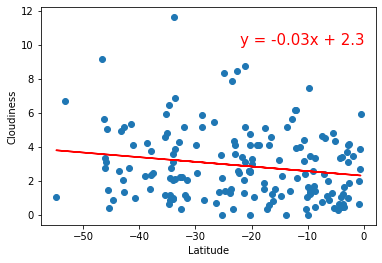

In [50]:
# Southern Hemisphere Wind Speed vs Lat Linear and Regress
x_lat = southern_hemi_df["Lat"]
y_wspeed = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wspeed)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_wspeed)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-22,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of the Northern Hemisphere between the correlation of wind speed vs. lies on a positive slope,with an r-value of 0.04, which is extremely close to zero, meaning when at zero, there would not be any linear relationship. On the other hand, the r-value of the Southern Hemisphere lies on a negative slope, with an r-value of -0.22. This means there is a negative relationship, however very weak negative relationship